In [128]:
# Primero hay que importar las librerías necesarias para leer el data set y hacer el modelo predictivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [129]:
df=pd.read_csv('C:/Users/diana/apps/proyectoprogra/proyecto_cocina/data/raw/Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


# Tratamientos de valores faltantes y atípicos

In [130]:
# Ver que columnas contienen valores faltantes y el tipo de datos que contiene [Numéricos, Categóricos]
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


(None,
 User ID           0
 Area code         0
 Location          0
 Gender            0
 YOB               0
 Marital Status    0
 Activity          0
 Budget            0
 Cuisines          0
 Alcohol           0
 Smoker            0
 Food Rating       0
 Service Rating    0
 Overall Rating    0
 Often A S         0
 dtype: int64)

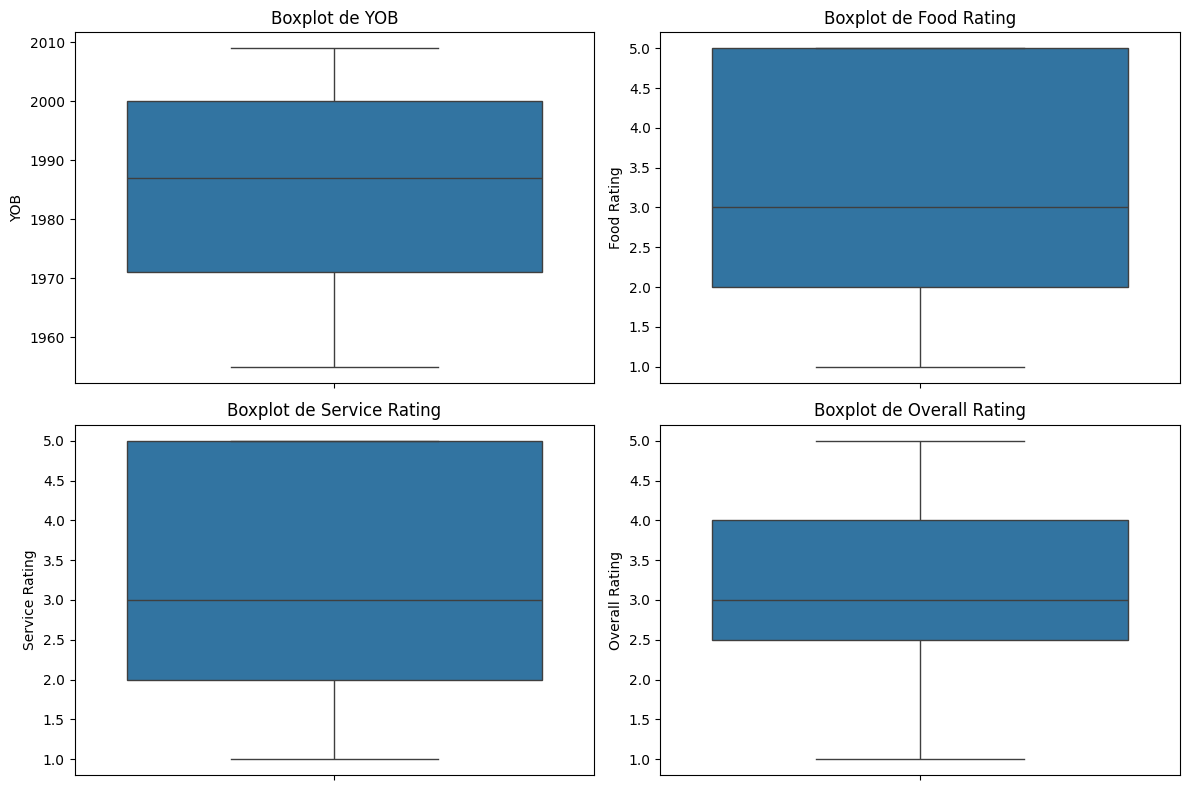

In [131]:
# Solo las columnas de variables cuantitativas pueden tener outliers, asi que hacemos un box plot para ver una representacion visual de estos
variables_atipicas = ['YOB', 'Food Rating', 'Service Rating', 'Overall Rating']

# Visualizar las variables relevantes con diagramas de caja
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables_atipicas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[variable])
    plt.title(f'Boxplot de {variable}')

plt.tight_layout()
plt.show()


#### Como se puede ver en el código, no hay valores nulos ni atípicos en este dataset por lo que no hay que tratar nada

# EDA Variables Cuantitativas

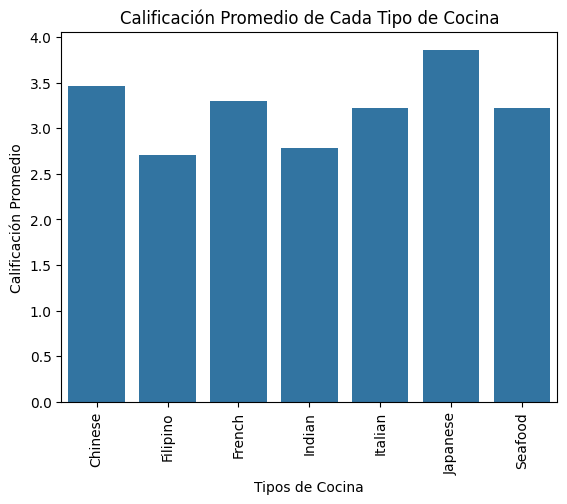

In [132]:
sns.barplot(x='Cuisines', y='Food Rating', data=df.groupby('Cuisines')['Food Rating'].mean().reset_index()) 
# La línea [df.groupby('Cuisines')['Food Rating'].mean()] saca el promedio de las calificaciones de cada tipo de cocina
# El reset index es por que sns no puede plotear df
plt.xticks(rotation=90)  # Este comando rota las etiquetas del eje x para que sean mas fáciles de leer
plt.xlabel('Tipos de Cocina')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio de Cada Tipo de Cocina')
plt.show()

##### En promedio, las cocinas con mejor rating son la Japonesa, China, y Francesa.

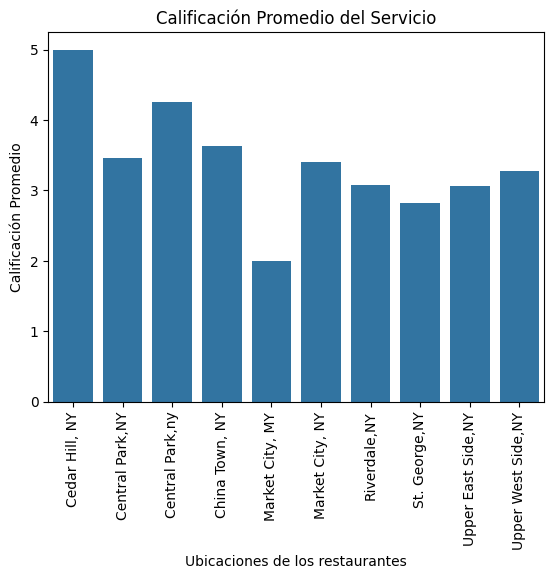

In [133]:
sns.barplot(x='Location', y='Service Rating', data=df.groupby('Location')['Service Rating'].mean().reset_index()) 
# La línea [df.groupby('Cuisines')['Food Rating'].mean()] saca el promedio de las calificaciones de cada tipo de cocina
# El reset index es por que sns no puede plotear df
plt.xticks(rotation=90)  # Este comando rota las etiquetas del eje x para que sean mas fáciles de leer
plt.xlabel('Ubicaciones de los restaurantes')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio del Servicio')
plt.show()

##### En promedio, las ubicaciones de los restaurantes con mejor servicio son "Central Hill" y "Central Park"

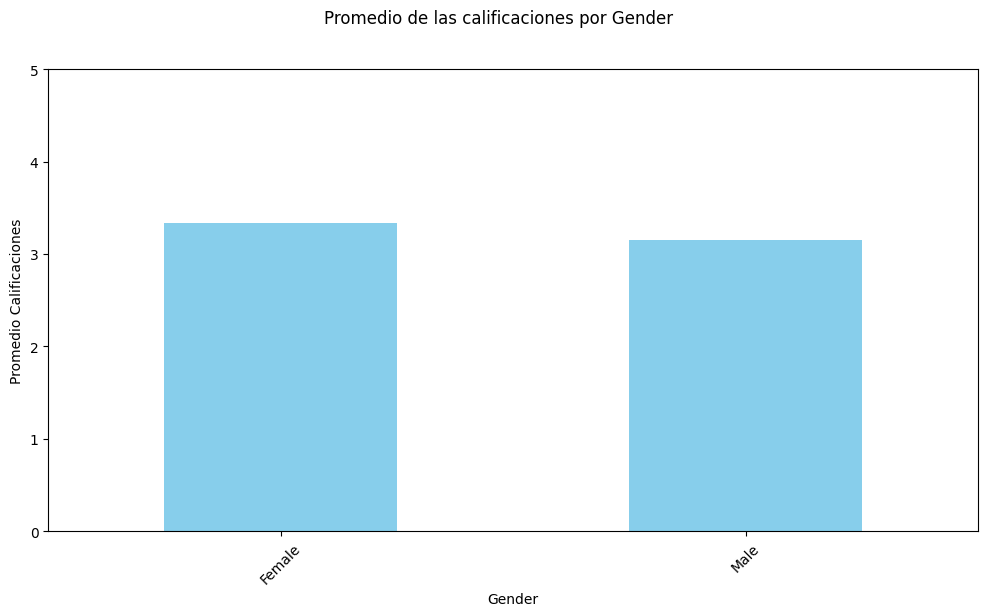

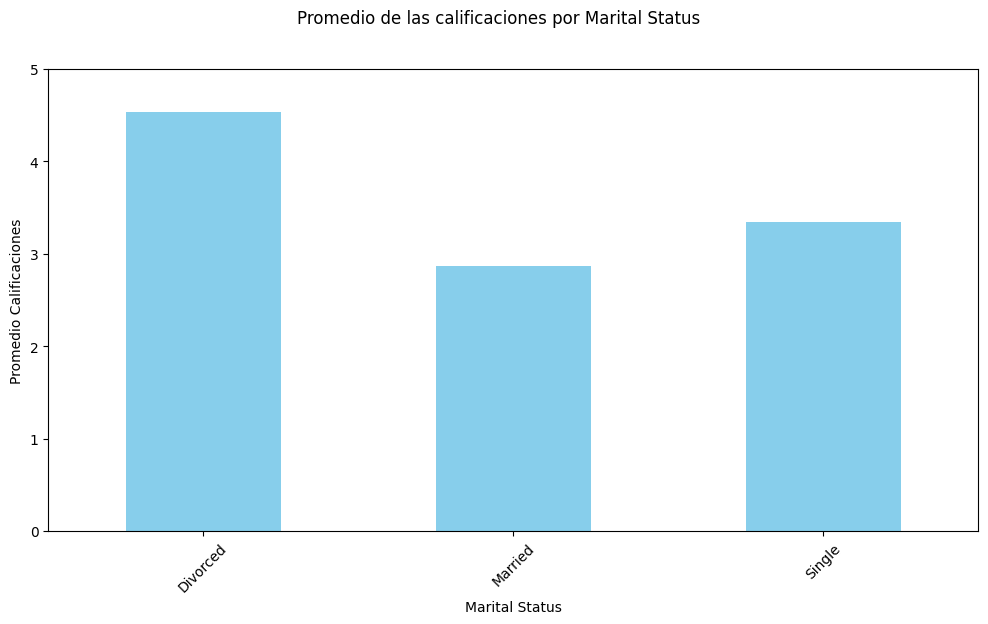

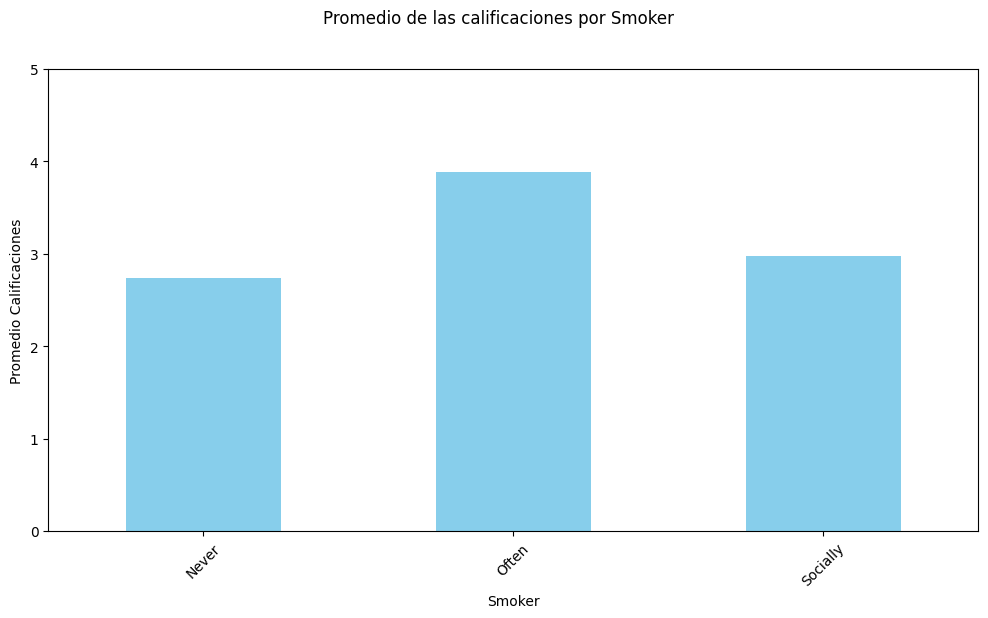

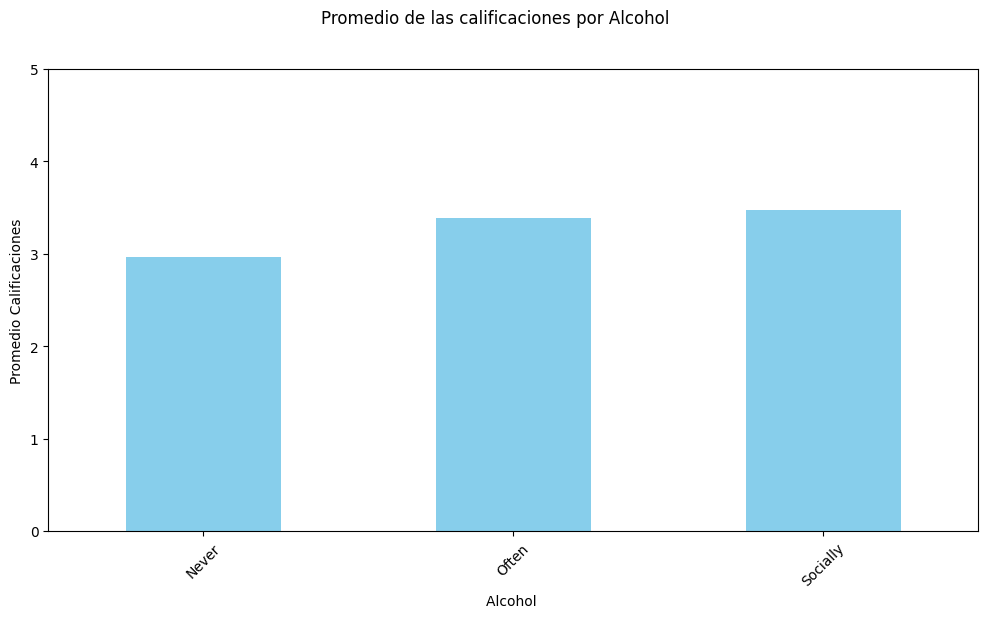

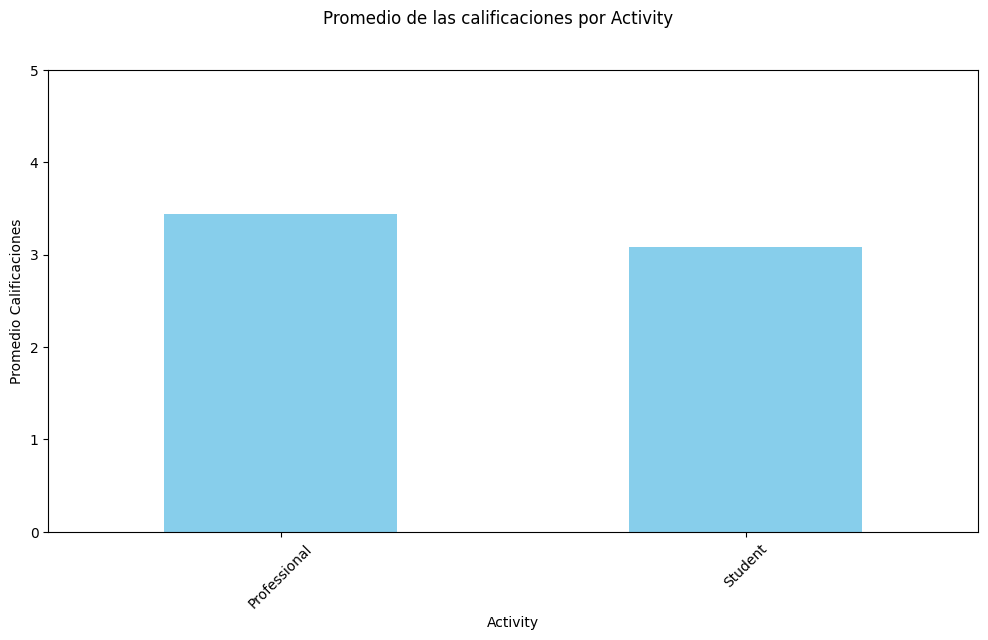

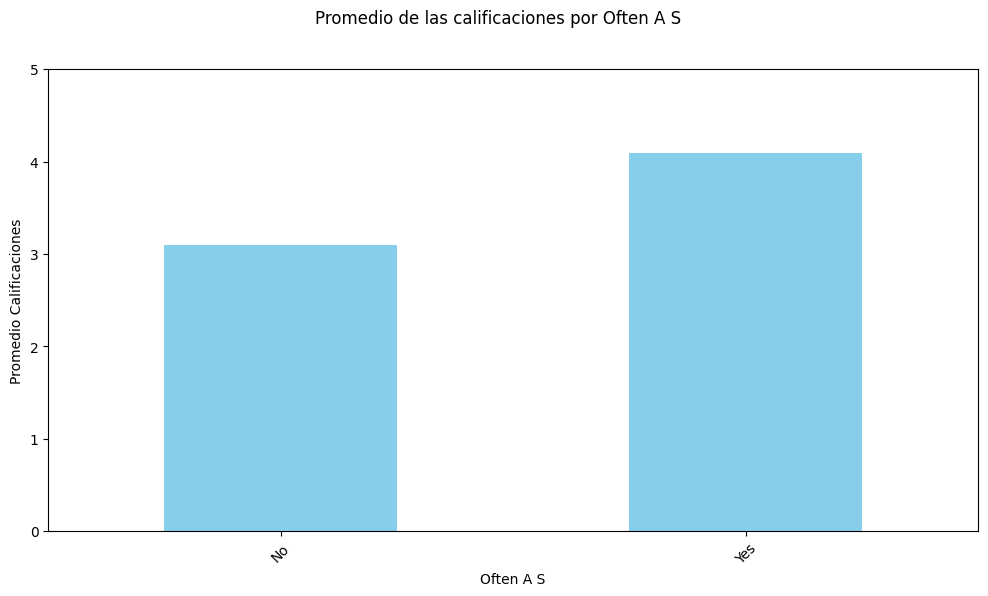

In [134]:
# Obtener todas las columnas categóricas, omitiendo columnas irrelevantes
columnas_categoricas = ['Gender', 'Marital Status', 'Smoker', 'Alcohol ', 'Activity', 'Often A S']

# Iterar sobre cada columna categórica
for columna in columnas_categoricas:
    # Crearlagráfica
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle(f'Promedio de las calificaciones por {columna}')
    
    # Obtener el promedio de lacoluma Overall Rating que son las calificacioes para cada valor de la columna categórica
    promedio_rating = df.groupby(columna)['Overall Rating'].mean()
    
    # Graficar
    promedio_rating.plot(kind='bar', ax=ax, color='skyblue')
    
    ax.set_xlabel(columna)
    ax.set_ylabel('Promedio Calificaciones')

    # Ajustar el rango del eje y, esto para que todas las graficas tenngann el mismo rango en y incluyendo los datos float
    ax.set_ylim(0, 5)
    
    # Ajustes al formato
    plt.xticks(rotation=45) #Gira las etiquetas del gráfico para que sean más faciles de leer y no se pongan unas encima de otras
    plt.show()

# EDA Variables Cualitativas

In [135]:
# Iterar sobre cada columna categórica
for columna in columnas_categoricas: # La variable columnas categóricas esta definida arriba
    print(f"Frecuencia de valores en la columna '{columna}':")
    print(df[columna].value_counts()) # Cual es la frecuencia de cada valor único en una columna
    print()  #Separa cada iteración del bucel para que se vea mejor


Frecuencia de valores en la columna 'Gender':
Gender
Male      118
Female     82
Name: count, dtype: int64

Frecuencia de valores en la columna 'Marital Status':
Marital Status
Single      100
Married      86
Divorced     14
Name: count, dtype: int64

Frecuencia de valores en la columna 'Smoker':
Smoker
Socially    71
Often       70
Never       59
Name: count, dtype: int64

Frecuencia de valores en la columna 'Alcohol ':
Alcohol 
Never       88
Often       61
Socially    51
Name: count, dtype: int64

Frecuencia de valores en la columna 'Activity':
Activity
Student         120
Professional     80
Name: count, dtype: int64

Frecuencia de valores en la columna 'Often A S':
Often A S
No     174
Yes     26
Name: count, dtype: int64



#### Resultados de frecuencias:

1. Hay mas **hombres [59%]** que **mujeres [41%]**.
2. Los usuarios **divorciados** solo representan un **[7%]** de todas las reseñas.
3. No hay tanta diferencia entre los que **fuman** o consumen **alcohol** de forma **social, seguida o nunca**.
4. El **[87%]** de los usuarios **no son clientes frecuentes** del lugar al cual le dejaron una reseña.

C:\Users\diana\AppData\Local\Temp\ipykernel_9788\3208270913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Location'], palette='mako')


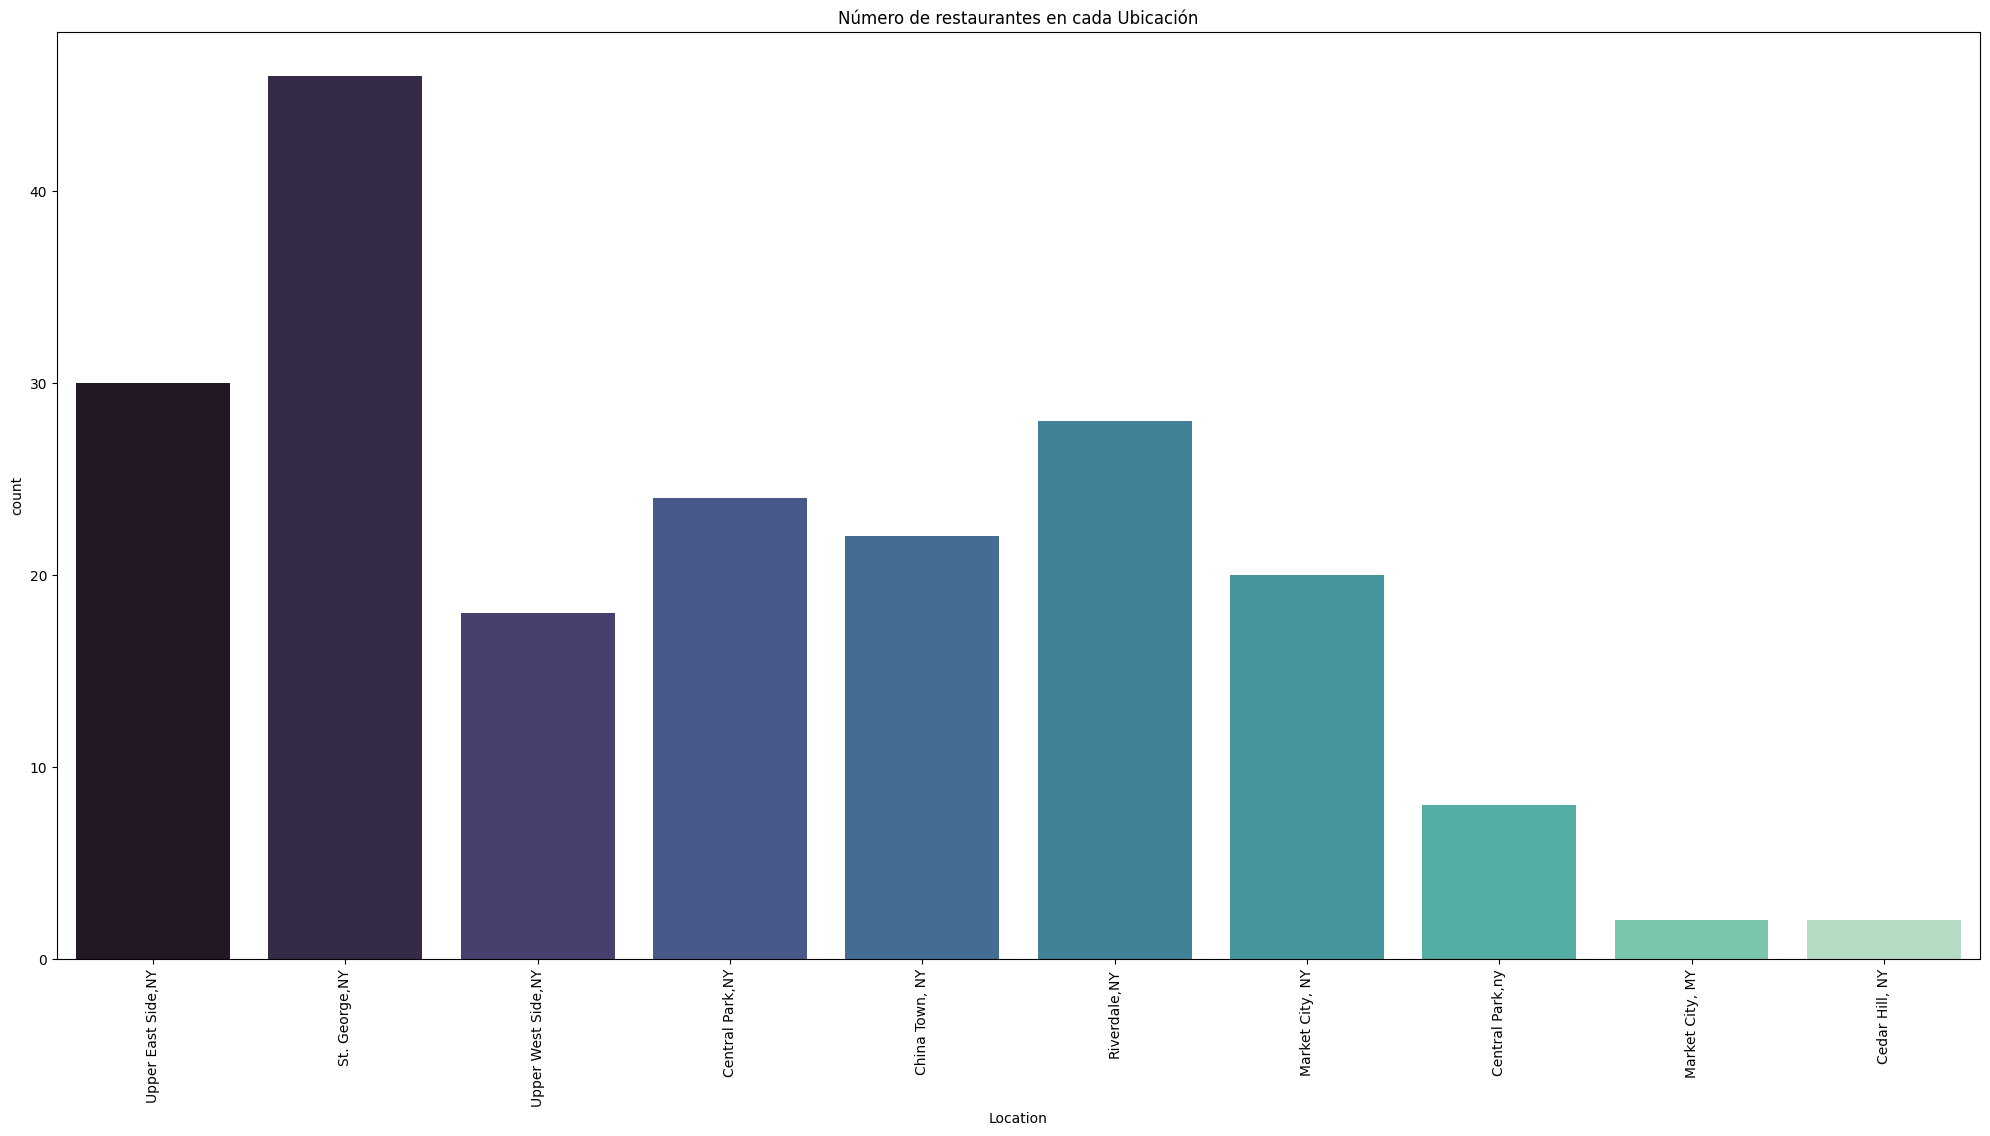

In [136]:

plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df['Location'], palette='mako')
plt.tight_layout()
plt.title('Número de restaurantes en cada Ubicación')
plt.xticks(rotation=90)
plt.show()

#### Las ubicaciones con más restaurantes se encuentran en "St. George,NY" y "Upper East Side,NY"

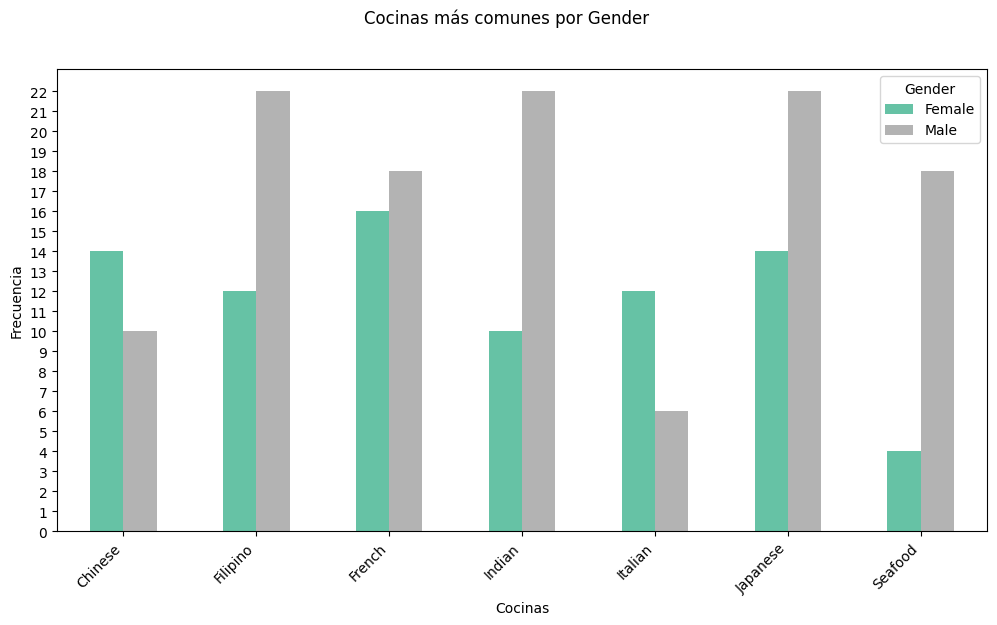

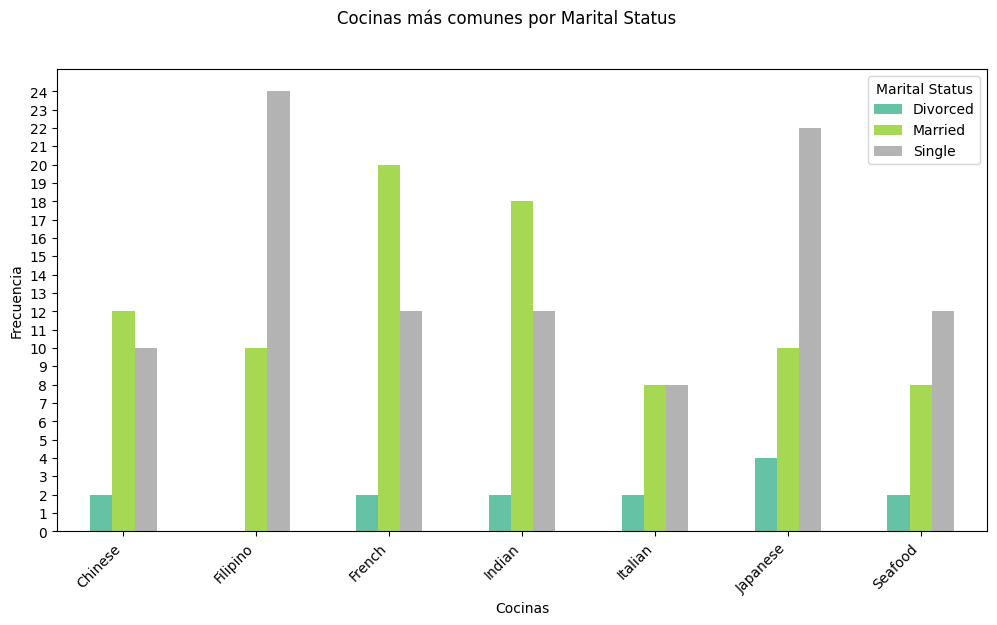

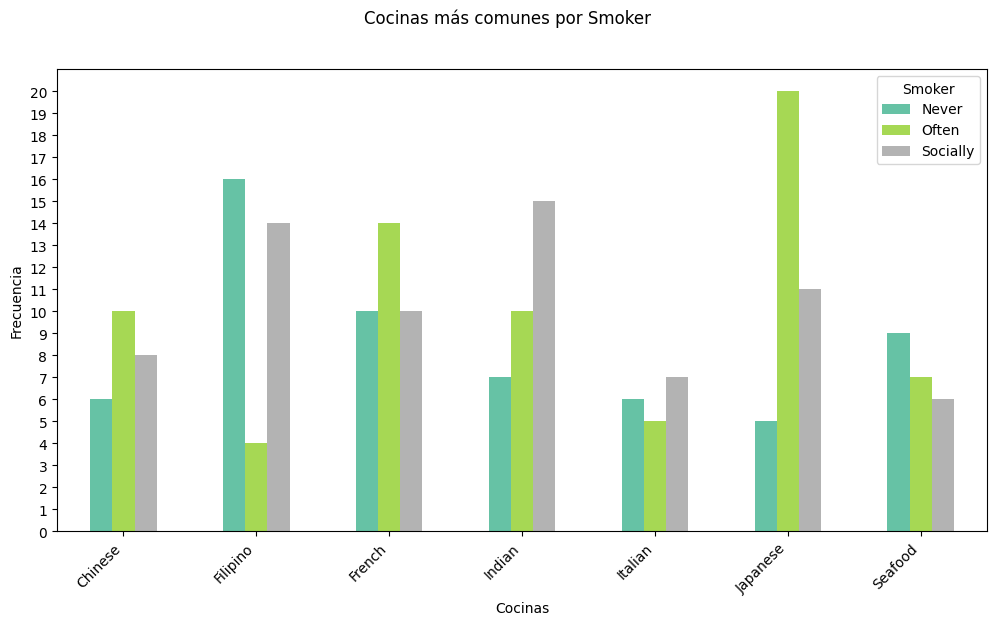

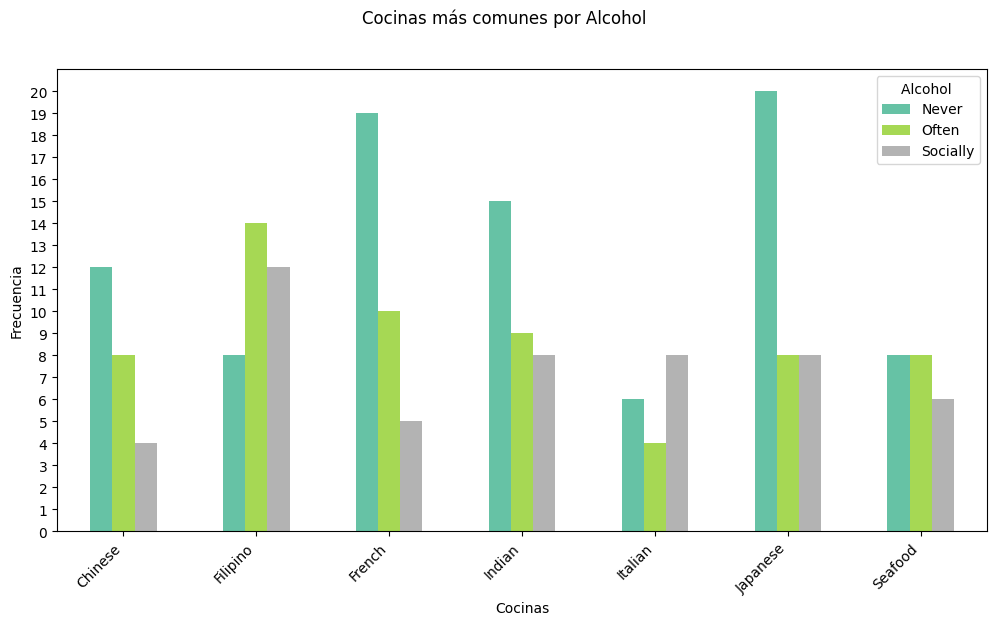

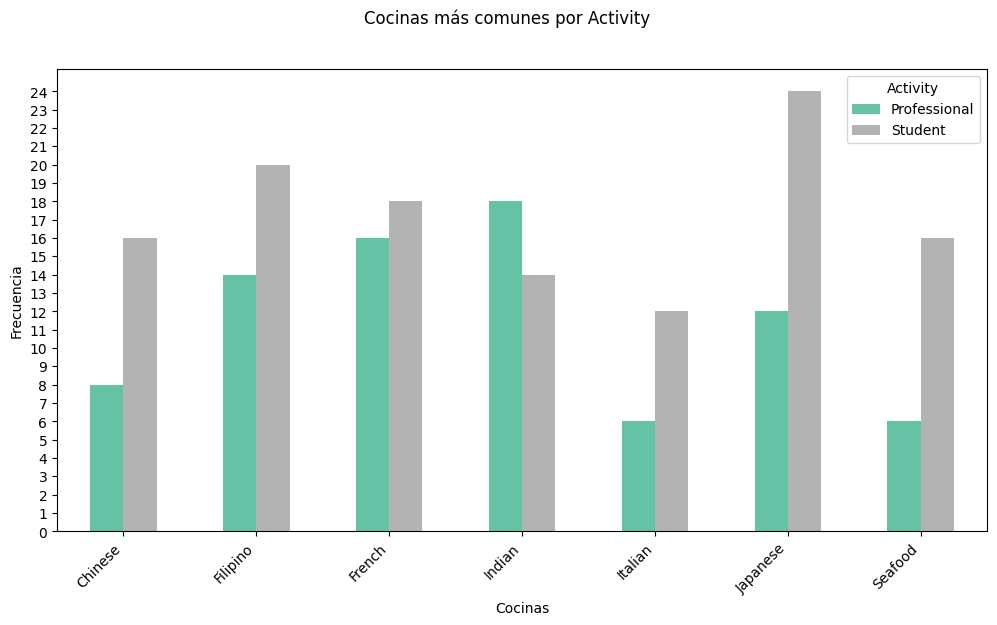

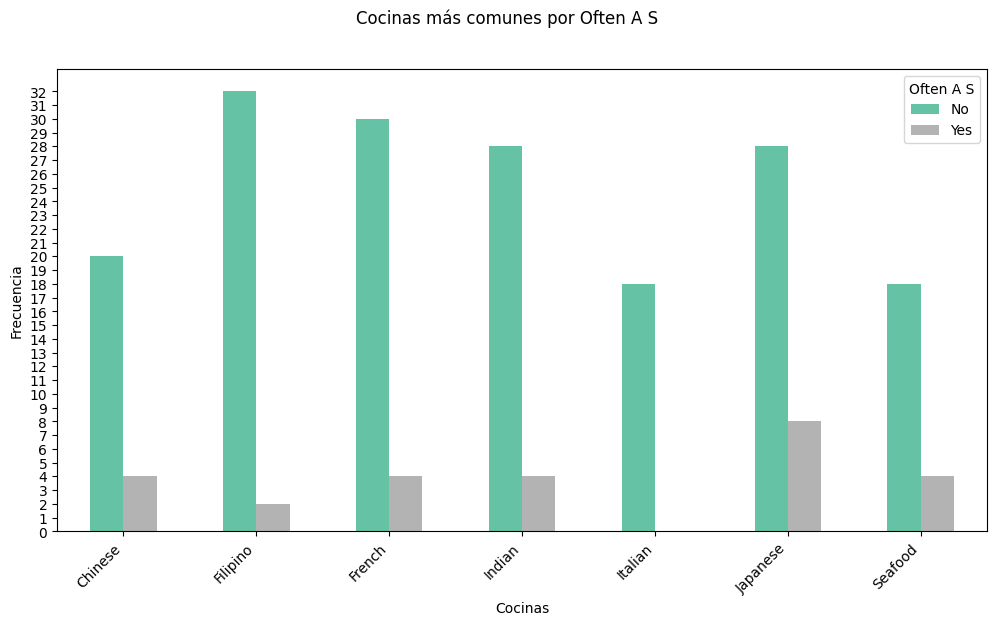

In [137]:
# Obtener todas las columnas categóricas, se omitirán columnas como User Id o Area code ya que no son tan relevantes y no se usan en el modelo.
columnas_categoricas = ['Gender', 'Marital Status', 'Smoker', 'Alcohol ', 'Activity','Often A S']

# Iterar sobre cada columna categórica
for columna in columnas_categoricas:
    # Crear un subplot
    fig, ax = plt.subplots(figsize=(12, 6)) #Determinar el tamaño de nuestra gráfica
    fig.suptitle(f'Cocinas más comunes por {columna}')
    
    # Obtener la frecuencia de cada cocina para cada valor de la columna categórica
    cocinas_frecuencia = df.groupby(['Cuisines', columna]).size().unstack() 
     #El parámetro unstack es para que agarre como etiquetas de x los tipos de cocina y no los valores de la columna que itera
    
    # Graficar
    cocinas_frecuencia.plot(kind='bar', stacked=False, ax=ax, cmap='Set2')
        # Se utiliza el parámetro stacked=False ya que si no, en vez de que las barras esten separadas unas de otras, estas aparecen apiladas
    
    ax.set_xlabel('Cocinas')
    ax.set_ylabel('Frecuencia')
    ax.legend(title=columna)
    
    # Ajustes de diseño
    plt.xticks(rotation=45, ha='right') # ha='right' --> Ajusta las etiquetas para que no se tapen con la gráfica
    plt.yticks(range(int(cocinas_frecuencia.max().max()) + 1)) # Esto es para ajustar la escala del eje y, y se personalice para cada columna
    plt.show()


# Modelo Predictivo

## Preparación de datos para el Modelado

In [138]:
# Redondear los valores de 'Overall Rating'
df['Overall Rating']=df['Overall Rating'].round().astype('int64')
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,2,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,2,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,4,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2,No


In [139]:
# Crear una columna de edad para sustituir la columna de YOB que es el año de nacimiento
df['Age'] = 2024 - df['YOB']
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4,No,18
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1,No,33
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5,Yes,47
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2,No,68
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3,No,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,2,No,42
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,2,No,24
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,4,No,18
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2,No,22


In [140]:
# Eliminar las columnas que no se usarán en el modelo ya que no representan algo 'útil'
df=df.drop(['User ID','Area code','YOB','Food Rating','Service Rating'],axis=1)
df

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,4,No,18
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,No,33
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,Yes,47
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,2,No,68
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,3,No,27
...,...,...,...,...,...,...,...,...,...,...,...
195,"St. George,NY",Female,Single,Professional,4,French,Never,Socially,2,No,42
196,"Upper West Side,NY",Female,Married,Student,4,Chinese,Never,Often,2,No,24
197,"St. George,NY",Female,Single,Professional,5,Japanese,Never,Often,4,No,18
198,"St. George,NY",Male,Married,Student,3,Filipino,Never,Socially,2,No,22


In [141]:
# El modelo KNN solo usa variables numéricas asi que aplicamos codificación One Hot a las variables categóricas 
df_onehot=pd.get_dummies(df).astype('int64')
df_onehot

,Budget,Overall Rating,Age,"Location_Cedar Hill, NY","Location_Central Park,NY","Location_Central Park,ny","Location_China Town, NY","Location_Market City, MY","Location_Market City, NY","Location_Riverdale,NY",...,Cuisines_Japanese,Cuisines_Seafood,Alcohol _Never,Alcohol _Often,Alcohol _Socially,Smoker_Never,Smoker_Often,Smoker_Socially,Often A S_No,Often A S_Yes
0,3,4,18,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,3,1,33,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,5,5,47,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,5,2,68,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,4,3,27,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,2,42,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
196,4,2,24,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
197,5,4,18,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
198,3,2,22,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [142]:
df_onehot.columns

Index(['Budget', 'Overall Rating', 'Age', 'Location_Cedar Hill, NY',
       'Location_Central Park,NY', 'Location_Central Park,ny',
       'Location_China Town, NY', 'Location_Market City, MY',
       'Location_Market City, NY', 'Location_Riverdale,NY',
       'Location_St. George,NY', 'Location_Upper East Side,NY',
       'Location_Upper West Side,NY', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Activity_Professional', 'Activity_Student',
       'Cuisines_Chinese', 'Cuisines_Filipino', 'Cuisines_French',
       'Cuisines_Indian', 'Cuisines_Italian', 'Cuisines_Japanese',
       'Cuisines_Seafood', 'Alcohol _Never', 'Alcohol _Often',
       'Alcohol _Socially', 'Smoker_Never', 'Smoker_Often', 'Smoker_Socially',
       'Often A S_No', 'Often A S_Yes'],
      dtype='object')

In [143]:
# Establecemos los parámetros del modelado
X = df_onehot.drop(columns=['Overall Rating']) # Independientes
y = df_onehot['Overall Rating'] # Target

In [144]:
# Como la codificacion One-Hot crea valores [0,1] hay que normalizar las columnas numéricas para que también esten en este rango
datos = X[['Budget', 'Age']]

min_max_scaler = MinMaxScaler()

X[['Budget', 'Age']] = min_max_scaler.fit_transform(datos)

In [145]:
X

,Budget,Age,"Location_Cedar Hill, NY","Location_Central Park,NY","Location_Central Park,ny","Location_China Town, NY","Location_Market City, MY","Location_Market City, NY","Location_Riverdale,NY","Location_St. George,NY",...,Cuisines_Japanese,Cuisines_Seafood,Alcohol _Never,Alcohol _Often,Alcohol _Socially,Smoker_Never,Smoker_Often,Smoker_Socially,Often A S_No,Often A S_Yes
0,0.50,0.055556,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,0.50,0.333333,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,1.00,0.592593,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,1.00,0.981481,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,0.75,0.222222,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.75,0.500000,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
196,0.75,0.166667,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
197,1.00,0.055556,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
198,0.50,0.129630,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [146]:
frecuencia_clases = y.value_counts()

print(frecuencia_clases)

Overall Rating
4    67
2    64
3    34
5    29
1     6
Name: count, dtype: int64


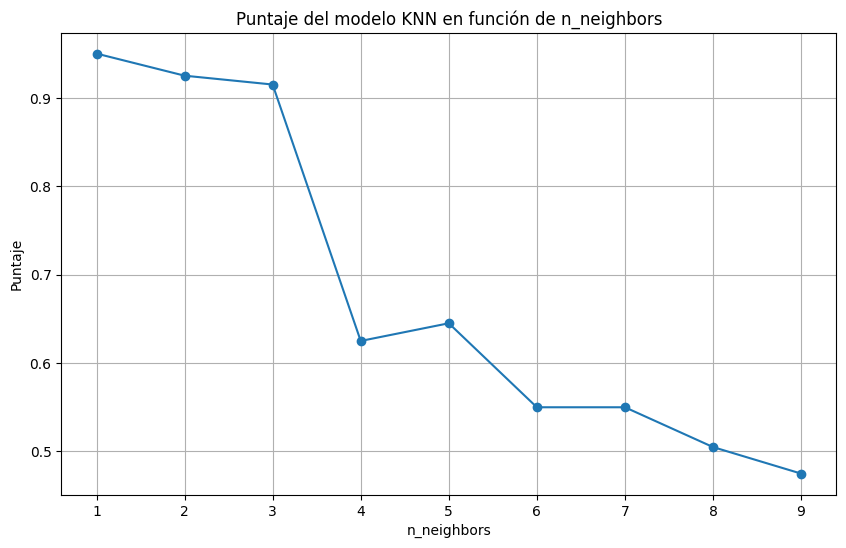

In [147]:
# Hay que determinar los parámetros de el modelo asi que creamos un for loop que itere sobre un rango y asi vemos que numero genera mayor precisión
precision = []

# Valores de n_neighbors a probar hasta que me de un buen score
rango_n = range(1, 10)

for n in rango_n :
    
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X, y)
    
    # Calcular el puntaje y agregarlo a una lista
    score = knn_model.score(X, y)
    precision.append(score)

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(rango_n , precision, marker='o')
plt.title('Puntaje del modelo KNN en función de n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Puntaje')
plt.grid(True)
plt.show()

In [148]:
# Ya tenemos todos los datos normalizados, y descrubimos que el parametro debe de ser 3 para buena precisión
# Aplicamos el modelo con todo lo anterior
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [149]:
knn_model.score(X,y)

0.915

#### El score del modelo es bastante bueno, sin embargo no es la mejor herramienta para ver que tan bien se ajusta el modelo a los datos, una métrica de medición mas precisa es la Validación cruzada, asi que intentemos eso.

In [150]:
# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Realizar validación cruzada con 5 divisiones (5-fold cross-validation)
scores = cross_val_score(knn_model, X, y, cv=5).mean()
scores

0.445

#### Como se puede ver, la CV es muy muy baja, por lo cual debemos de hacer algunos ajustes en el modelo para intentar mejorarlo, esto se puede lograr jugando un poco con los parámetros, pero en este caso se usará una librería que hará eso por nosotros

In [151]:
# Como vemos en la celda de arriba, la CV no es muy buena que digamos, asi que emplearemos el uso de una librería la cual se encarga de ella misma encontrar los mejores parámetros

#Establecemos los parametros de nuestro modelo, no me voy a meter tanto en estos asi que solo incluiré los que considero mas relevantes
parametros = {
    'n_neighbors': list(range(1,11)),  # Diferentes valores para el número de vecinos
    'weights': ['uniform', 'distance'],  # Diferentes métodos de ponderación
}

knn_parametros=KNeighborsClassifier() #Creo una nueva clase para que no haya problemas con que se sobreescriba

# Busca los mejores hiperparámetros en el modelo que establecimos
grid_search = GridSearchCV(knn_parametros, parametros, cv=5)  # cv es el numero de 'folds' que hace, pueden asignar cualquier numero pero casi siempre se pone 5 o 10.

# Esto entrena las variables 
grid_search.fit(X, y)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores:", grid_search.best_params_) # el codigo best_params se utiliza para que devuelva el diccionario que en la búsqueda proporciono los mejores resultados

Mejores: {'n_neighbors': 3, 'weights': 'distance'}


#### Esta librería en resumido, busca las combinaciones de los parámetros que le indiquemos y saca la CV, al final usamos el método de **best_params_** para que nos indique que combinación de parámetros logró el mayor puntaje

# Ajustes del Modelo

#### Utilizaremos los parámetros encontrados previamente

In [152]:
# Ya tenemos los parámetros que mejor rendimiento generan asi que los utilizaremos para mejorar el modelo
# Crear un modelo KNN con el número de vecinos especificado y el peso de cercanía
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [153]:
# Realizar validación cruzada
scores = cross_val_score(knn_model, X, y, cv=5).mean()
scores

0.8600000000000001

#### Como podemos ver la CV aumentó mas de un **[40%]**

#### Grafiquemos el puntaje de validación cruzada cuando solo usamos el parámetro de **n_neighbors**
    - El valor default de weights es 'Uniform' por eso no lo agregamos en el código

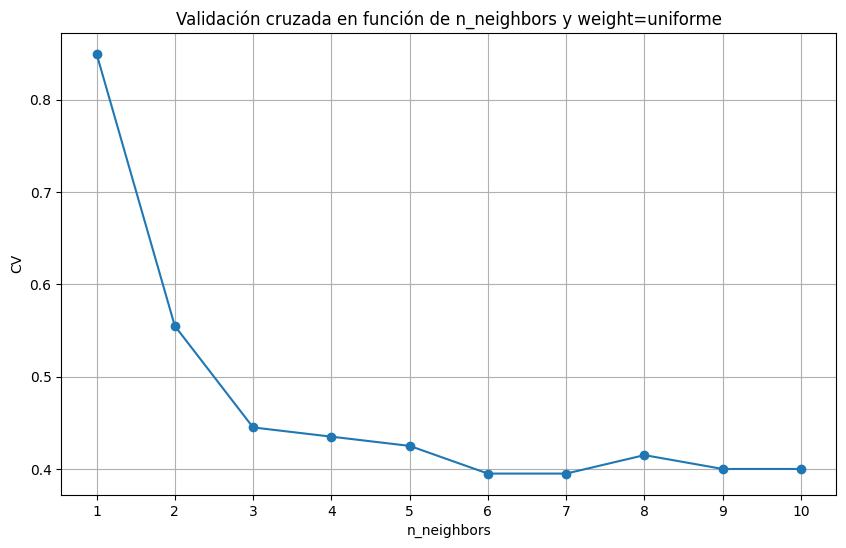

In [154]:
# Definir el rango de valores para n_neighbors
rango_vecinos = range(1, 11) #Estas serán nuestro eje x

# Lista para almacenar los puntajes  de la CV
calificaciones_cv = []

for i in rango_vecinos:
    # Crear un clasificador KNN con el valor actual de n_neighbors
    knn_grafica = KNeighborsClassifier(n_neighbors=i)
    # Realizar validación cruzada y obtener los puntajes
    calificacion = cross_val_score(knn_grafica, X, y, cv=5)
    # Calcular el puntaje promedio y agregarlo a la lista
    calificaciones_cv.append(np.mean(calificacion))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(rango_vecinos, calificaciones_cv, marker='o')
plt.title('Validación cruzada en función de n_neighbors y weight=uniforme')
plt.xlabel('n_neighbors')
plt.ylabel('CV')
plt.grid(True)
plt.xticks(rango_vecinos)  # Asegurarse de que se muestren todos los valores de n_neighbors en el eje x
plt.show()

#### Ahora grafiquemos los puntajes usando el parámetro de **weights**

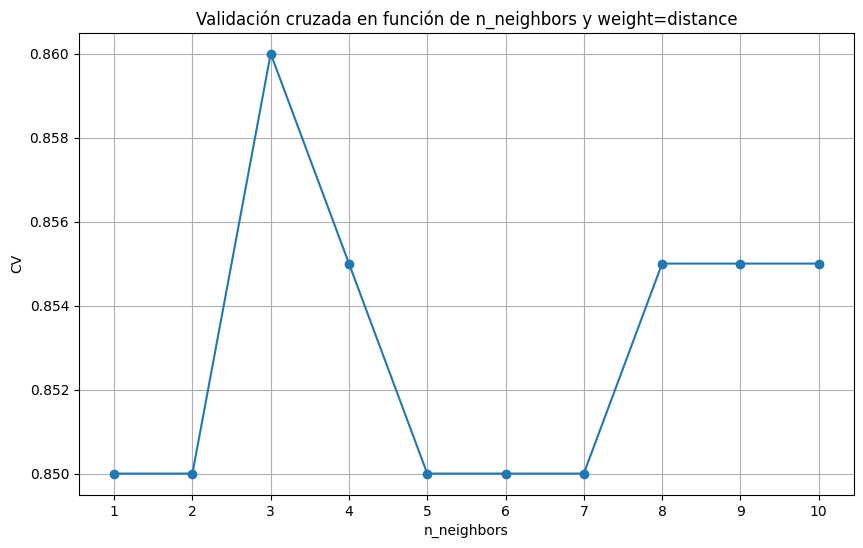

In [155]:
# Definir el rango de valores para n_neighbors
rango_vecinos = range(1, 11) #Estas serán nuestro eje x

# Lista para almacenar los puntajes  de la CV
calificaciones_cv2 = [] #Lista nueva ya que agregamos el parametro del peso

for i in rango_vecinos:
    # agregamos el segundo parámetro que arrojo la busqueda
    knn_grafica2 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    # Realizar validación cruzada y obtener los puntajes
    calificacion = cross_val_score(knn_grafica2, X, y, cv=5)
    # Calcular el puntaje promedio y agregarlo a la lista
    calificaciones_cv2.append(np.mean(calificacion))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(rango_vecinos, calificaciones_cv2, marker='o')
plt.title('Validación cruzada en función de n_neighbors y weight=distance')
plt.xlabel('n_neighbors')
plt.ylabel('CV')
plt.grid(True)
plt.xticks(rango_vecinos)  # Asegurarse de que se muestren todos los valores de n_neighbors en el eje x
plt.show()

# Datos Extras que afectan al modelo

#### Este dataset es muy bueno en términos de un EDA descriptivo, hay varias formas de ver las distribuciones categóricas y las frecuencias de estas, sin embargo, en un acercamiento de modelado predictivo no es el mejor por las sigueintes razones:
1. Son muy pocos datos: El dataset solo tiene 200 instancias así que no es el mejor cuando se requiere crear un modelo de predicción.
2. La mayoría de features son categóricos: Si bien esto no es un impedimento, si hace que la codificacion del modelo sea un poco mas compleja y cuando nomralizamos los datos también es algo confuso.
3. La distribución de las clases: En este dataset hay 5 clases: **[1,2,3,4,5]**, sin emabrgo la distribucion de estas es muy poco uniforme, ya que hay clases que tienen 10x más datos que otras por lo que el algoritmo puede llegar a ser un poco inestable debido a eso.